In [1]:
!python ../../Part-Aware-Transformer/train.py --config_file "UAM_rubbishbins_all.yml"

2025-05-10 17:42:09,888 PAT INFO: Saving model in the path :/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Lab_PC/LogsRubbishbins/UAM
2025-05-10 17:42:09,888 PAT INFO: Namespace(config_file='UAM_rubbishbins_all.yml', opts=[], local_rank=0)
2025-05-10 17:42:09,888 PAT INFO: Loaded configuration file UAM_rubbishbins_all.yml
2025-05-10 17:42:09,888 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" #test 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DA

In [2]:
!python ../../Part-Aware-Transformer/update.py --config_file "UAM_rubbishbins_test_all.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_rubbishbins.txt"

2025-05-10 17:58:26,069 PAT INFO: Namespace(config_file='UAM_rubbishbins_test_all.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_rubbishbins.txt')
2025-05-10 17:58:26,070 PAT INFO: Loaded configuration file UAM_rubbishbins_test_all.yml
2025-05-10 17:58:26,070 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATASETS:
  TRAIN: ('UAM

## Run with flip
track file should be renamed to no erase baseline

In [3]:
!python ../../Part-Aware-Transformer/update_flip.py --config_file "UAM_rubbishbins_test_all.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_rubbishbins.txt"

2025-05-10 17:58:38,342 PAT INFO: Namespace(config_file='UAM_rubbishbins_test_all.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_rubbishbins.txt')
2025-05-10 17:58:38,342 PAT INFO: Loaded configuration file UAM_rubbishbins_test_all.yml
2025-05-10 17:58:38,342 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATASETS:
  TRAIN: 

## Compare outputs
1st normal updated vs. 2nd inference with flipped too

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/UrbAM-ReID/Code/')

In [5]:
from Evaluate_UrbAM_ReID_fn import evaluate_reid

In [6]:
mAP_base, CMC_base = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_rubbishbins.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/rubishbinss/"
)

In [7]:
mAP_flip, CMC_flip = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_rubbishbins.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/rubishbinss/"
)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


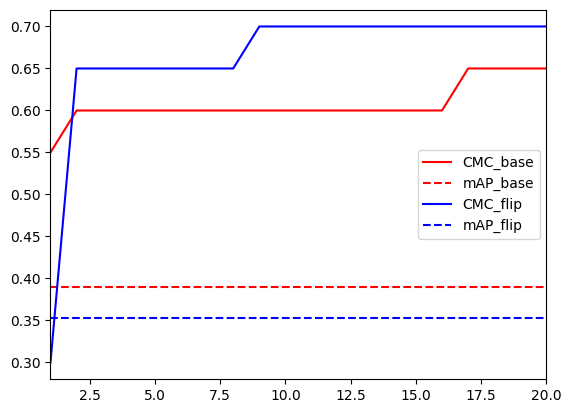

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

x = [i+1 for i in range(len(CMC_base))]
print(x)

ax.plot(x, CMC_base, 'r', label='CMC_base')
ax.plot(x, np.full_like(CMC_base, mAP_base), 'r--', label='mAP_base')
ax.plot(x, CMC_flip, 'b', label='CMC_flip')
ax.plot(x, np.full_like(CMC_flip, mAP_flip), 'b--', label='mAP_flip')

ax.set_xlim(1,len(CMC_base))
ax.legend()

plt.show()

## Run with flip for training and inference

In [ ]:
!python ../../Part-Aware-Transformer/train_flip.py --config_file "UAM_rubbishbins_all_flip2.yml"

### Training with flip and testing without

In [ ]:
!python ../../Part-Aware-Transformer/update.py --config_file "UAM_rubbishbins_test_all_flip2.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_rubbishbins_flip1.txt"

### Training with flip and testing with flip

In [ ]:
!python ../../Part-Aware-Transformer/update_flip.py --config_file "UAM_rubbishbins_test_all_flip2.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_rubbishbins_flip2.txt"

### Comparing results

In [ ]:
mAP_flip1, CMC_flip1 = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_rubbishbins_flip1.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/rubishbinss/"
)

In [ ]:
mAP_flip2, CMC_flip2 = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_rubbishbins_flip2.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/rubishbinss/"
)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

x = [i+1 for i in range(len(CMC_flip1))]

ax.plot(x, CMC_flip1, 'r', label='CMC_flip1')
ax.plot(x, np.full_like(CMC_flip1, mAP_flip1), 'r--', label='mAP_flip1')
ax.plot(x, CMC_flip2, 'b', label='CMC_flip2')
ax.plot(x, np.full_like(CMC_flip2, mAP_flip2), 'b--', label='mAP_flip2')

ax.set_xlim(1,len(CMC_flip1))
ax.legend()

plt.show()